# Importing tools

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and seeing the description

In [2]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target

### splitting the dataset into 2 

In [3]:
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

print('Accuracy on the training dataset: {:.3f}' .format(tree2.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(tree2.score(X_test,y_test)))

Accuracy on the training dataset: 0.988
Accuracy on the testing dataset: 0.951


### here it is getting overfit on the trainig dataset so we need to pre-prune it

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree2=DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)

print('Accuracy on the training dataset: {:.3f}' .format(tree2.score(X_train,y_train)))
print('Accuracy on the testing dataset: {:.3f}' .format(tree2.score(X_test,y_test)))

Accuracy on the training dataset: 0.988
Accuracy on the testing dataset: 0.951


In [20]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree2,out_file='cancertree.dot', class_names=['malignant','benign'],feature_names=cancer.feature_names,
                impurity=False, filled=True)

![](cancertree.png)

In [10]:
print('Feautre importances: {}'.format(tree2.feature_importances_))

Feautre importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [11]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Weight of the features

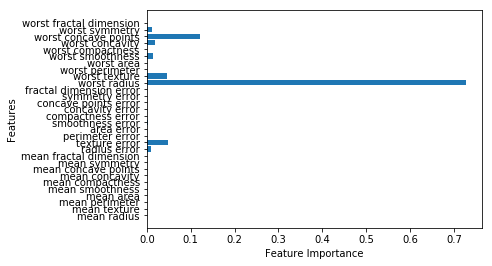

In [14]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features),tree2.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## Advantages of Decision Tree
* Easy to understand
* No need of pre-processing,normalise,scale and/or standardize features

## Parameters to work with
* max_depth
* min_samples_leaf and max_samples_leaf
* max_leaf_nodes etc

## Disadvantages
* tendency to overfit
* poor generalisation
